In [1]:
import pandas as pd
import libcirctis

result_file = 'outputs/06.tsv'

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
df_eval = pd.read_csv(result_file, sep='\t')
df_eval

,fold,n_samples_train,n_samples_train_pos,n_samples_train_neg,n_samples_test,n_samples_test_pos,n_samples_test_neg,sample_size,up_sample_size,down_sample_size,kernel,C1,C2,degree,train_time,pred_time,TP,FP,FN,TN,Precision,Recall,F1-score,Specificity,Accuracy,AUROC,AUPR
0,1,10170,5085,5085,26788,1298,25490,203,100,103,WeightedDegreeStringKernel,1.0,1.0,1,9.131483,0.099336,1110,7021,188,18469,0.136515,0.855162,0.235444,0.724559,0.730887,0.865260,0.314127
1,2,10222,5111,5111,26627,1272,25355,203,100,103,WeightedDegreeStringKernel,1.0,1.0,1,10.237491,0.106132,1064,7032,208,18323,0.131423,0.836478,0.227156,0.722658,0.728096,0.860190,0.314104
2,3,10222,5111,5111,26691,1272,25419,203,100,103,WeightedDegreeStringKernel,1.0,1.0,1,10.539965,0.100751,1084,7021,188,18398,0.133745,0.852201,0.231204,0.723789,0.729909,0.865037,0.310607
3,4,10236,5118,5118,26546,1265,25281,203,100,103,WeightedDegreeStringKernel,1.0,1.0,1,10.308630,0.101016,1080,6825,185,18456,0.136622,0.853755,0.235551,0.730034,0.735930,0.875846,0.352255
4,5,10214,5107,5107,26173,1276,24897,203,100,103,WeightedDegreeStringKernel,1.0,1.0,1,10.376937,0.104272,1098,6719,178,18178,0.140463,0.860502,0.241504,0.730128,0.736484,0.871300,0.330353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,1,10170,5085,5085,26788,1298,25490,203,100,103,WeightedDegreeStringKernel,1.0,1.0,203,55.185024,1.623287,1258,7290,40,18200,0.147169,0.969183,0.255535,0.714005,0.726370,0.972627,0.893460
1011,2,10222,5111,5111,26627,1272,25355,203,100,103,WeightedDegreeStringKernel,1.0,1.0,203,65.484564,1.664410,1239,7457,33,17898,0.142479,0.974057,0.248596,0.705896,0.718707,0.978627,0.915536
1012,3,10222,5111,5111,26691,1272,25419,203,100,103,WeightedDegreeStringKernel,1.0,1.0,203,60.467992,1.677057,1235,7474,37,17945,0.141807,0.970912,0.247470,0.705968,0.718594,0.976287,0.908678
1013,4,10236,5118,5118,26546,1265,25281,203,100,103,WeightedDegreeStringKernel,1.0,1.0,203,62.161454,1.721989,1226,7295,39,17986,0.143880,0.969170,0.250562,0.711443,0.723725,0.974370,0.900298


In [6]:
# CV means ordered
df_eval_cv = df_eval.groupby('degree').mean()
df_eval_cv = df_eval_cv.sort_values('F1-score', ascending=False)
df_eval_cv.head(30)

,fold,n_samples_train,n_samples_train_pos,n_samples_train_neg,n_samples_test,n_samples_test_pos,n_samples_test_neg,sample_size,up_sample_size,down_sample_size,C1,C2,train_time,pred_time,TP,FP,FN,TN,Precision,Recall,F1-score,Specificity,Accuracy,AUROC,AUPR
degree,,,,,,,,,,,,,,,,,,,,,,,,,
20,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,50.606995,0.387981,1227.8,5590.0,48.8,19698.4,0.180136,0.961787,0.303428,0.778969,0.787754,0.974829,0.859856
22,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,47.202715,0.401945,1228.2,5595.4,48.4,19693.0,0.180036,0.962097,0.303303,0.778753,0.787564,0.975352,0.869075
21,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,48.034245,0.382973,1227.6,5593.2,49.0,19695.2,0.180020,0.961628,0.303257,0.778840,0.787624,0.975111,0.864900
23,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,45.953271,0.371914,1228.4,5600.2,48.2,19688.2,0.179932,0.962254,0.303163,0.778563,0.787390,0.975568,0.873145
19,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,45.493505,0.377177,1227.8,5599.2,48.8,19689.2,0.179895,0.961788,0.303085,0.778606,0.787408,0.974510,0.854501
24,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,42.185406,0.387236,1229.0,5607.0,47.6,19681.4,0.179820,0.962723,0.303029,0.778293,0.787156,0.975763,0.876889
25,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,44.064547,0.413639,1229.0,5609.4,47.6,19679.0,0.179757,0.962728,0.302939,0.778197,0.787065,0.975932,0.879649
18,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,48.875214,0.365783,1227.2,5607.6,49.4,19680.8,0.179601,0.961322,0.302645,0.778274,0.787069,0.974143,0.848354
26,3.0,10212.8,5106.4,5106.4,26565.0,1276.6,25288.4,203.0,100.0,103.0,1.0,1.0,45.513126,0.420074,1229.0,5617.6,47.6,19670.8,0.179541,0.962728,0.302632,0.777873,0.786756,0.976084,0.882658


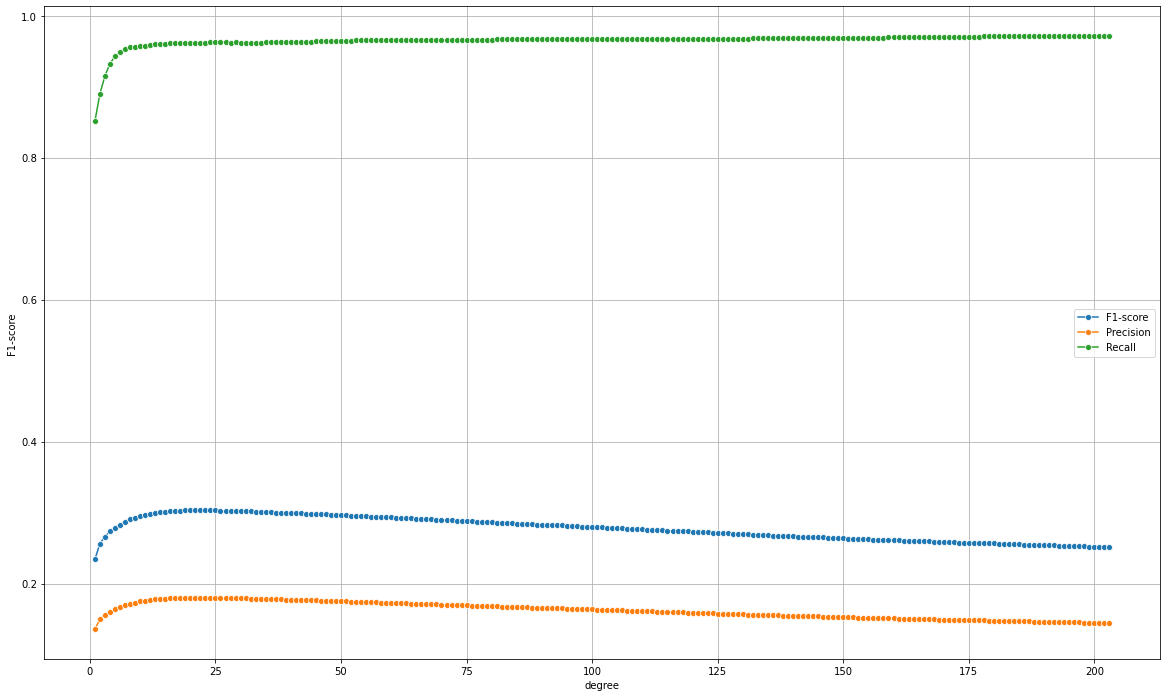

In [4]:
# Line chart
x_axis = 'degree'
y_axis = ['F1-score', 'Precision', 'Recall']
libcirctis.plot_line_chart(df_eval_cv, x_axis, y_axis)